<a href="https://colab.research.google.com/github/StivenVelasquez/Mini-proyecto-1-Analisis-Multivariado-de-Seniales-Sismograficas/blob/main/Mini_proyecto_1_An%C3%A1lisis_Multivariado_de_Se%C3%B1ales_Sismogr%C3%A1ficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>Mini-proyecto 1: Análisis Multivariado de Señales Sismográficas*</center>

<div align="justify">
Integrantes:

<div align="justify">
*   Stiven Velásquez López
<div align="justify">
*   Yeiner Pajaro Otero




![texto_alternativo](https://i.imgur.com/kunq9OP.png).

In [ ]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc
import scipy.signal as signal

**CARGANDO LAS BASES DE DATOS**

In [ ]:
ruta_Sismo_Local = 'https://drive.google.com/file/d/1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA/view?usp=share_link'
!gdown  "1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA&confirm=t" -O 'sisLoc.mat' # sismo Local

Downloading...
From: https://drive.google.com/uc?id=1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA&confirm=t
To: /content/sisLoc.mat
100% 377k/377k [00:00<00:00, 85.4MB/s]


In [ ]:
ruta_Sismo_Regional = 'https://drive.google.com/file/d/1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI/view?usp=share_link'
!gdown  "1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI&confirm=t" -O 'sisReg.mat' # sismo Regional

Downloading...
From: https://drive.google.com/uc?id=1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI&confirm=t
To: /content/sisReg.mat
100% 1.55M/1.55M [00:00<00:00, 76.8MB/s]


In [ ]:
ruta_Telesismo = 'https://drive.google.com/file/d/17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2/view?usp=share_link'
!gdown  "17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2&confirm=t" -O 'sisTele.mat' # Telesismo

Downloading...
From: https://drive.google.com/uc?id=17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2&confirm=t
To: /content/sisTele.mat
100% 1.44M/1.44M [00:00<00:00, 128MB/s]


<div align="justify"><strong><em>1. AL BANCO DE SEÑALES DE LA BASE DE DATOS SE LE DEBEN IMPLEMENTAR UN PROCESO DE FILTRADO ENTRE [1 − 50] HZ. PARA ELLO, IMPLEMENTE EL FILTRO DE SU INTERÉS Y JUSTIFIQUE LA ELECCIÓN DE ACUERDO A SU DESEMPEÑO Y EL DIAGRAMA DE MAGNITUD Y FASE.</em></strong></div>

<div align="justify"><strong><em>Filtro utilizado</em></strong></div>

<div align="justify">
Para filtrar la señal de la base de datos entre 1-50 Hz, se puede utilizar un filtro pasa-banda de Butterworth de cuarto orden. Este tipo de filtro es  especialmente adecuado para señales que tienen una alta relación señal-ruido y que requieren un filtrado preciso y eficaz. Este tipo de filtro proporciona una respuesta en frecuencia plana en la banda de paso, lo que minimiza la distorsión de la señal y preserva su forma de onda original. Además, la pendiente gradual en la banda de paso evita la introducción de artefactos no deseados y ayuda a mantener la calidad de la señal filtrada.
</div>

<div align="justify">
Para elegir los parámetros del filtro, podemos usar la función butter del módulo scipy.signal. Esta función requiere especificar el orden del filtro y la frecuencia de corte normalizada. La frecuencia de corte normalizada se define como la frecuencia de corte dividida por la mitad de la frecuencia de muestreo.
</div>

<div align="justify">
La elección de un filtro pasa-banda de Butterworth de cuarto orden con frecuencias de corte normalizadas de 0.02 y 1.0 es adecuada para filtrar una señal de la base de datos entre 1-50 Hz, ya que permite una atenuación rápida y efectiva en la banda de rechazo y una pendiente gradual en la banda de paso. La selección de estas frecuencias de corte normalizadas proporciona una buena precisión en la selección de la banda de paso y rechazo, lo que se traduce en una mejor calidad de la señal filtrada. Además, el filtro pasa-banda de cuarto orden tiene una respuesta en frecuencia más precisa y nítida que los filtros de menor orden, lo que es especialmente importante cuando se trata de señales complejas y con una amplia gama de frecuencias.
</div>



In [ ]:
#Construir función filtro pasabanda
def Filtrado_pasabanda(x,fs,fc1,fc2,order):

  b, a = signal.butter(order, [fc1/(fs/2),fc2/(fs/2)],'bandpass' )#Calcula los coeficientes del filtro Butterworth

  # Aplica el filtro a la señal de entrada
  x = signal.filtfilt(b, a, x)
  
  return x,b,a

In [ ]:
#función para graficar las señales almacenadas y filtradas.
def  plot_signals(X,title,xlabel,ylabel):
  plt.figure(figsize= (10,6))
  for i in X:
    for j in i:
      plt.plot(j)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel )
  plt.grid(True)
  plt.show()

In [ ]:
#Carga los datos de tres archivos .mat diferentes ("sisLoc.mat", "sisReg.mat" y "sisTele.mat")
data_local = sc.loadmat('sisLoc.mat')
data_regional = sc.loadmat('sisReg.mat')
data_telesismo = sc.loadmat('sisTele.mat')

#Se extraen las matrices de datos específicas de cada archivo .mat usando la sintaxis de indexación de matriz de Python
Y_local = data_local['Y']
Y_regional = data_regional['Y']
Y_telesismo = data_telesismo['Y']

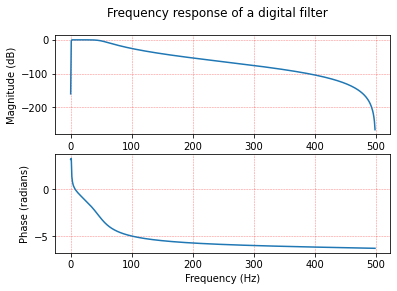

In [ ]:
#Lista de señales almacenadas 
señales_almacenadas = [Y_local,Y_regional,Y_telesismo]
aux = []

#variables importantes para el procesamiento de la señal
fs = 1000
fc1 = 1
fc2 = 50
order = 4

signal_filtered = []  # Creamos una lista vacía para almacenar cada una de las señales filtradas.

for i in señales_almacenadas: 
  aux= [] # Creamos una lista vacía para ir almacenando el filtrado para cada señal empezando con las 21 señales de sismo local 
  for j in i:
    x, b ,a = Filtrado_pasabanda(j,fs,fc1,fc2,order) 
    aux.append(x)  #se van almacenando en la variable auxiliar por cada tipo de sismo
  signal_filtered.append(np.array(aux)) #Obtenos para todos los tipos de sismo las señales filtradas.

w, h = signal.freqz(b, a)
fig, ax = plt.subplots(2, 1)
ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))
ax[0].set_ylabel('Magnitude (dB)')
ax[0].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
ax[1].plot(fs * w / (2 * np.pi), np.unwrap(np.angle(h)))
ax[1].set_ylabel('Phase (radians)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

fig.suptitle('Frequency response of a digital filter')
plt.show()



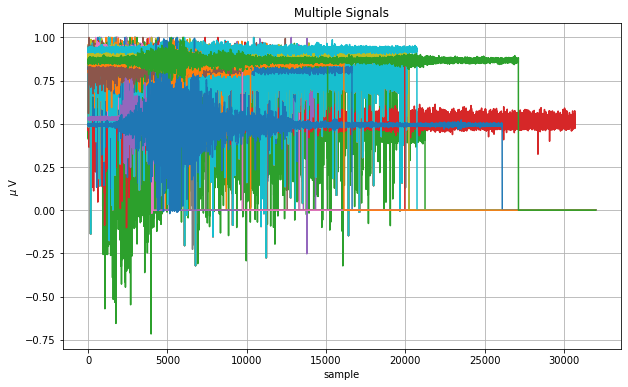

In [ ]:
#Señales almacenadas
plot_signals(señales_almacenadas,"Multiple Signals","sample","$\mu$ V")

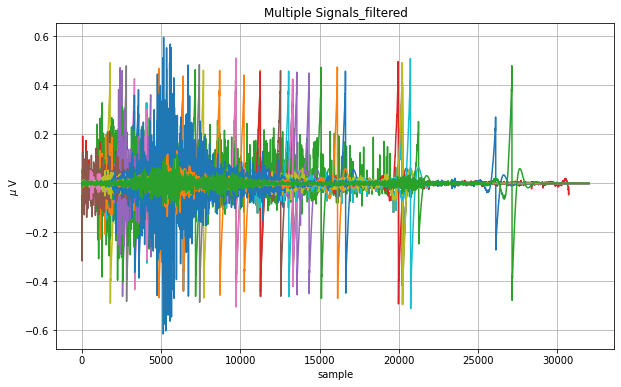

In [ ]:
plot_signals(signal_filtered,"Multiple Signals_filtered","sample","$\mu$ V")



<div align="justify"><strong><em>2. LUEGO DE QUE LAS SEÑALES ESTÁN FILTRADAS, SE DESEA HACER UNA REPRESENTACIÓN DE ESPECTROS SINGULARES DE TAL FORMA QUE SE REPRESENTEN MEDIANTE UN CONJUNTO DE G SEÑALES SUBYACENTES QUE REPRESENTEN LA SEÑAL ORIGINAL DEL SISMO. ESTE PROCESO ES IMPORTANTE DEBIDO A QUE PERMITE PROYECTAR UNA SERIE DE TIEMPO EN UN ESPACIO REPRESENTATIVO</em></strong></div>

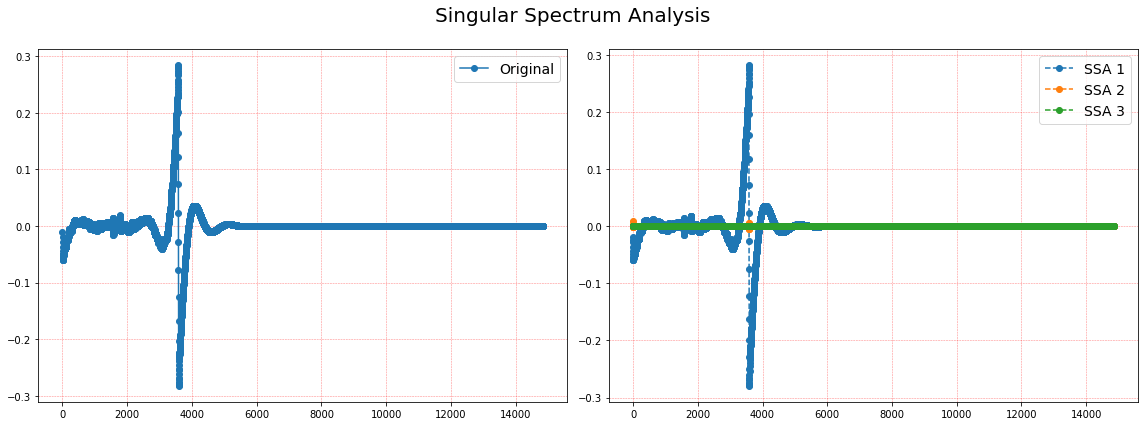

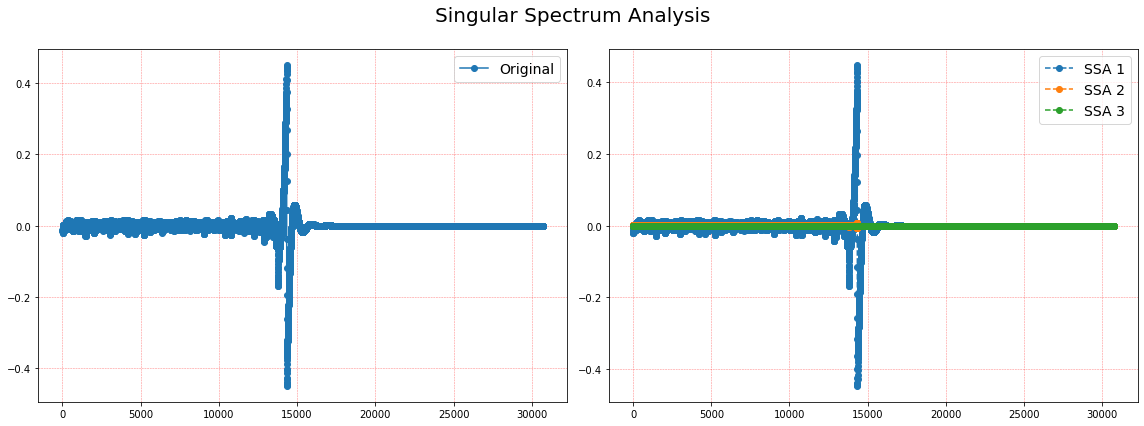

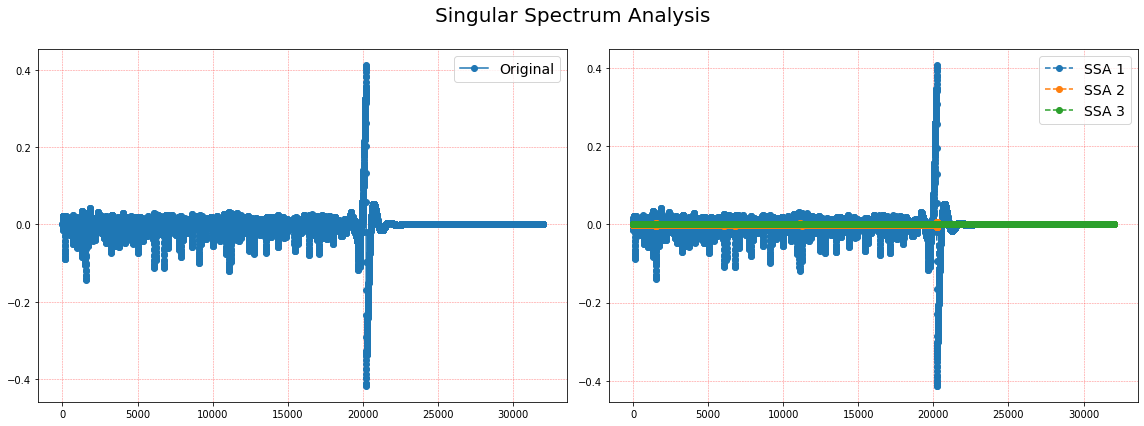

In [ ]:
# We decompose the time series into three subseries
signal_spectrum_singular = []

for i in signal_filtered: 
  X = i # Conjunto de 21 sismos
  groups = 3
  # Singular Spectrum Analysis
  ssa = SingularSpectrumAnalysis(window_size=groups)
  X_ssa = ssa.fit_transform(X)
  signal_spectrum_singular.append(X_ssa)

  # Show the results for the first time series and its subseries
  plt.figure(figsize=(16, 6))
  idSignal = 3
  ax1 = plt.subplot(121)
  ax1.plot(X[idSignal], 'o-', label='Original')
  ax1.legend(loc='best', fontsize=14)
  ax1.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

  ax2 = plt.subplot(122)

  for j in range(groups):
      ax2.plot(X_ssa[idSignal, j], 'o--', label='SSA {0}'.format(j + 1))
  ax2.legend(loc='best', fontsize=14)

  plt.suptitle('Singular Spectrum Analysis', fontsize=20)
  plt.tight_layout()
  plt.subplots_adjust(top=0.88)
  plt.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
  plt.show()

  # The first subseries consists of the trend of the original time series.
  # The second and third subseries consist of noise.

In [ ]:
print(len(X_ssa[0]))

3


(<Axes: >, [<matplotlib.lines.Line2D at 0x7fab42b10af0>])

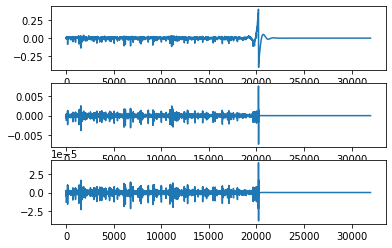

In [ ]:
plt.subplot(3,1,1),plt.plot(X_ssa[idSignal, 0])
plt.subplot(3,1,2),plt.plot(X_ssa[idSignal, 1])
plt.subplot(3,1,3),plt.plot(X_ssa[idSignal, 2])

In [ ]:
# Imprime el tipo de datos de la variable signal_spectrum_singular y su longitud
print(type(signal_spectrum_singular))
print(len(signal_spectrum_singular))

# Imprime el tipo de datos de la primera dimensión de signal_spectrum_singular y su longitud
print(type(signal_spectrum_singular[0]))
print(len(signal_spectrum_singular[0]))

# Imprime el tipo de datos de la variable signal_spectrum_singular y la longitud de su tercera dimensión
print(type(signal_spectrum_singular))
print(len(signal_spectrum_singular[0][0]))


<class 'list'>
3
<class 'numpy.ndarray'>
21
<class 'list'>
3


In [ ]:
# Imprime el tipo de datos de la variable signal_filtered y su longitud
print(type(signal_filtered))
print(len(signal_filtered))

# Imprime el tipo de datos de la primera dimensión de signal_filtered y su longitud
print(type(signal_filtered[0]))
print(len(signal_filtered[0]))

# Imprime el tipo de datos de la segunda dimensión de signal_filtered y su longitud
print(type(signal_filtered[0][0]))
print(len(signal_filtered[0][0]))

<class 'list'>
3
<class 'numpy.ndarray'>
21
<class 'numpy.ndarray'>
14848


<div align="justify"><strong><em>3. SE DEBE ANALIZAR LA VARIACIÓN DE MÍNIMO 3 GRUPOS DE REPRESENTACIÓN POR CADA TIPO DE SEÑAL EN LA BASE DE DATOS. LA SIGUIENTE TABLA MUESTRA LAS CARACTERÍSTICAS MÁS RELEVANTES PARA EXTRAER DE UN PROCESO.</em></strong></div>

![texto_alternativo](https://i.imgur.com/nEwrDdV.png).


<div align="justify"><strong><em>SE DEBE CREAR UN MÓDULO EN PYTHON QUE REALICE LA EXTRACCIÓN DE CARACTERÍSTICAS DE TAL FORMA QUE PARA CADA UNO DE LAS 63 SEÑALES SISMOGRÁFICAS, SE CONSTRUYA UNA MATRIZ DE LA FORMA $X \in \mathbb{R}^{N\times D}$ , DONDE N ES EL NÚMERO DE OBSERVACIONES (EN ESTE CASO LAS REALIZACIONES DE LAS SEÑALES SÍSMICAS), Y D ES EL NÚMERO DE CARACTERÍSTICAS RESULTANTES EN EL PROCESO DE EXTRACCIÓN.</em></strong></div>


<div align="justify">El siguiente código toma una señal y su frecuencia de muestreo como entrada, y calcula la Short Time Fourier Transform (STFT) de la señal usando la función signal stft() de la biblioteca Scipy. Luego, calcula varias propiedades de la STFT, incluyendo la energía de la señal, la potencia máxima y su frecuencia, y varias estadísticas del espectro, como la media, varianza, máximo y mínimo. Finalmente, devuelve todos estos valores, junto con la STFT calculada.</div>


In [ ]:
import numpy as np
from scipy import signal

def caracteristicas(datos, frecuencia_de_muestreo, nperseg):
    frecuencias, tiempos, espectro = signal.stft(datos, frecuencia_de_muestreo, nperseg=nperseg)
    energia = np.sum(np.square(datos))
    frecuencia_pxx, pxx = signal.welch(datos, fs=1.0)
    potencia_maxima = np.max(pxx)
    frecuencia_maxima = frecuencia_pxx[np.argmax(pxx)]
    media_espectro = np.mean(np.abs(espectro))
    varianza_espectro = np.var(np.abs(espectro))
    maximo_espectro = np.max(np.abs(espectro))
    minimo_espectro = np.min(np.abs(espectro))

    # Retornar los valores calculados
    return energia, potencia_maxima, frecuencia_maxima, media_espectro, varianza_espectro, maximo_espectro, minimo_espectro, frecuencias, tiempos, espectro



<div align="justify">El siguiente código define tres funciones que calculan diferentes características estadísticas de una lista de valores: entropía, estadísticas básicas (porcentiles, media, varianza, raíz media cuadrática) y número de cruces de cero y cruces de la media. También hay una función llamada get_features que utiliza estas tres funciones para devolver todas las características en una lista.</div>

In [ ]:
import scipy 
from scipy.stats import entropy

#Define a function to calculate entropy of a list of values
def calculate_entropy(list_values):
  value,counter_values = np.unique(list_values, return_counts=True)#Get the unique values and their frequency
  entropyVal = entropy(counter_values, base=None)#Calculate the entropy
  return entropyVal

#Define a function to calculate statistics of a list of values
def calculate_statistics(list_values):
  #Calculate the percentiles
  n5 = np.nanpercentile(list_values, 5)
  n25 = np.nanpercentile(list_values, 25)
  n75 = np.nanpercentile(list_values, 75)
  n95 = np.nanpercentile(list_values, 95)
  
  #Calculate the median, mean, standard deviation, variance and RMS
  median = np.nanpercentile(list_values, 50)
  mean = np.nanmean(list_values)
  std = np.nanstd(list_values)
  var = np.nanvar(list_values)
  rms = np.nanmean(np.sqrt(list_values**2))
  return [n5, n25, n75, n95, median, mean, std, var, rms]

#Define a function to calculate the zero-crossings and mean-crossings of a list of values
def calculate_crossings(list_values):
  zero_crossing_indices = np.where(np.diff(np.signbit(list_values)))[0]
  no_zero_crossings = len(zero_crossing_indices)
  mean_crossing_indices = np.where(np.diff(np.signbit(list_values-np.nanmean(list_values))))[0]
  no_mean_crossings = len(mean_crossing_indices)
  return [no_zero_crossings, no_mean_crossings]

#Define a function to get all features of a list of values
def get_features(list_values):
  #Calculate the entropy, crossings and statistics
  entropy = calculate_entropy(list_values)
  crossings = calculate_crossings(list_values)
  statistics = calculate_statistics(list_values)
  return [entropy] + crossings + statistics

<div align="justify">El siguiente código importa la biblioteca ipywidgets y define una función llamada Sismos_STFT que toma tres argumentos: dataset, index y group. Dependiendo del valor del argumento dataset, se selecciona una señal de una base de datos predefinida y se extrae una señal específica de esa base de datos utilizando los argumentos index y group.
</div>
<div align="justify">
Luego, se calculan varias características de la señal seleccionada, como la energía, el espectro medio, la varianza del espectro, el espectro máximo y mínimo, la frecuencia de máxima potencia, y se visualiza el espectrograma de la señal utilizando la función propiedades y la función get_features.
</div>
<div align="justify">
Finalmente, la función Sismos_STFT se hace interactiva utilizando la biblioteca ipywidgets para permitir la selección de los argumentos index y group utilizando deslizadores, y el argumento dataset utilizando un menú desplegable.
</div>




In [ ]:
# Import the required modules
import ipywidgets as widgets
from IPython.display import display

# Define the function Sismos_STFT with parameters dataset, index, and group
def Sismos_STFT(dataset, index, group):
    # Definir un diccionario para mapear las opciones del conjunto de datos a los índices de la matriz "signal_spectrum_singular"
  dataset_dict = {'sisLoc': 0, 'sisReg': 1, 'telesis': 2}

  # Obtener el índice correspondiente a la opción del conjunto de datos seleccionada
  dataset_index = dataset_dict.get(dataset)

  # Si el índice es válido, asignar signal_data a la matriz correspondiente a ese índice
  if dataset_index is not None:
      signal_data = signal_spectrum_singular[dataset_index]

      # Extraer una señal de muestra de la base de datos y visualizar el espectrograma
      sample_signal = signal_data[index][group]
      energia, potencia_maxima, frecuencia_maxima, media_espectro, varianza_espectro, maximo_espectro, minimo_espectro, frecuencias, tiempos, espectro = caracteristicas(sample_signal,1000,512)
      feature_set = get_features(sample_signal)

  print('*****************************************************************************************************************************************************')
  print('CARACTERÍSTICAS DE LAS SEÑALES SISMICAS')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Energy: {energia}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Maximum power: {potencia_maxima}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Frequency at maximum power: {frecuencia_maxima}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Mean spectrum: {media_espectro}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Variance of spectrum: {varianza_espectro}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Minimum spectrum: {minimo_espectro}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print('characteristics of wavelet analysis:')
  print(feature_set)
  print('*****************************************************************************************************************************************************')

# Define the widgets
index_widget = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Index:')
dataset_widget = widgets.Dropdown(options=['sisLoc', 'sisReg', 'telesis'], value='sisLoc', description='Dataset:')
group_widget = widgets.IntSlider(value=0, min=0, max=2, step=1, description='Group:')

# Define the interactive output
output = widgets.interactive_output(Sismos_STFT, { 'dataset': dataset_widget,'index': index_widget, 'group': group_widget})

# Display the widgets and the output
display(widgets.VBox([dataset_widget, index_widget, group_widget, output]))

In [ ]:
# Definir matriz de características
matrizCaracteristicas = [np.zeros((21, 3, 19)) for i in range(3)]

# Imprimir información sobre la matriz
print(type(matrizCaracteristicas))
print(len(matrizCaracteristicas))
print(type(matrizCaracteristicas[0]))
print(len(matrizCaracteristicas[0]))
print(type(matrizCaracteristicas[0][0]))
print(len(matrizCaracteristicas[0][0]))
print(type(matrizCaracteristicas[0][0][0]))
print(len(matrizCaracteristicas[0][0][0]))


<class 'list'>
3
<class 'numpy.ndarray'>
21
<class 'numpy.ndarray'>
3
<class 'numpy.ndarray'>
19


In [ ]:
#Iterar sobre las señales y agregar caracterrísticas calculadas
for i in range (len(signal_spectrum_singular)):
  for j in range(len(signal_spectrum_singular[i])):
    for k in range(len(signal_spectrum_singular[i][j])):
      # Get properties of the signal using the "propiedades" function
      energy, max_power, max_power_freq, mean_spectrum, var_spectrum, max_spectrum, min_spectrum,f,t,zxx = caracteristicas(signal_spectrum_singular[i][j][k],1000,512)

      # Get features of the signal using the "get_features" function 
      conjuntoFeatures = get_features(signal_spectrum_singular[i][j][k])

      # Combine the properties and features into a feature matrix
      matrizCaracteristicas[i][j][k] = np.concatenate([np.array([energy, max_power, max_power_freq, mean_spectrum, var_spectrum, max_spectrum, min_spectrum]), conjuntoFeatures])

In [ ]:
def imprimir_matriz(matriz):
    def imprimir_elementos(elementos):
        if isinstance(elementos, list):
            for elemento in elementos:
                imprimir_elementos(elemento)
        else:
            print(type(elementos))
            print(len(elementos))

    imprimir_elementos(matriz)

    for elementos_nivel_1 in matriz:
        if isinstance(elementos_nivel_1, list):
            for elementos_nivel_2 in elementos_nivel_1:
                if isinstance(elementos_nivel_2, list):
                    for elemento in elementos_nivel_2:
                        if isinstance(elemento, list):
                            for elemento_nivel_4 in elemento:
                                print(elemento_nivel_4)
                        else:
                            print(elemento)
                else:
                    print(elementos_nivel_2)
        else:
            print(elementos_nivel_1)

In [ ]:
imprimir_matriz(matrizCaracteristicas)

<class 'numpy.ndarray'>
21
<class 'numpy.ndarray'>
21
<class 'numpy.ndarray'>
21
[[[2.45383313e+01 1.21596615e-01 3.90625000e-03 ... 4.06516518e-02
   1.65255679e-03 1.11855551e-02]
  [8.56401982e-04 2.30061727e-06 3.90625000e-02 ... 2.40161875e-04
   5.76777263e-08 5.47487817e-05]
  [2.88098956e-08 8.45774904e-11 4.68750000e-02 ... 1.39295180e-06
   1.94031471e-12 3.67590104e-07]]

 [[3.20733977e+01 1.60525288e-01 3.90625000e-03 ... 4.64769317e-02
   2.16010518e-03 1.17886990e-02]
  [8.97944790e-04 2.81692563e-06 3.90625000e-02 ... 2.45918097e-04
   6.04757104e-08 3.50184951e-05]
  [2.60393399e-08 8.90142837e-11 4.68750000e-02 ... 1.32428237e-06
   1.75372380e-12 1.99032058e-07]]

 [[1.20592532e+01 5.89617331e-02 3.90625000e-03 ... 2.84961145e-02
   8.12028543e-04 7.72073674e-03]
  [4.22098873e-04 9.19158375e-07 3.90625000e-02 ... 1.68605217e-04
   2.84277191e-08 1.88301976e-05]
  [1.36189697e-08 3.42645640e-11 4.68750000e-02 ... 9.57714965e-07
   9.17217955e-13 1.22346007e-07]]

 ...

In [ ]:
import pandas as pd
import numpy as np

# Convertir la lista en una matriz de numpy
matriz = np.array(matrizCaracteristicas)
matriz_N= matriz.reshape(189, 19)

# Crear un diccionario con los nombres de las columnas y los datos correspondientes
datos = {}
datos['energia'] = matriz_N[:, 0]
datos['potencia_max'] = matriz_N[:, 1]
datos['frecuencia_max'] = matriz_N[:, 2]
datos['media_espectro'] = matriz_N[:, 3]
datos['var_espectro'] = matriz_N[:, 4]
datos['max_espectro'] = matriz_N[:, 5]
datos['entropia'] = matriz_N[:, 6]
datos['min_espectro'] = matriz_N[:, 7]
datos['no_cero_crossing'] = matriz_N[:, 8]
datos['no_mean_crossing'] = matriz_N[:, 9]
datos['n5'] = matriz_N[:, 10]
datos['n25'] = matriz_N[:, 11]
datos['n75'] = matriz_N[:, 12]
datos['n95'] = matriz_N[:, 13]
datos['mediana'] = matriz_N[:, 14]
datos['media'] = matriz_N[:, 15]
datos['std'] = matriz_N[:, 16]
datos['varianza'] = matriz_N[:, 17]
datos['rms'] = matriz_N[:, 18]
datos['TipoSismo'] = ["sisLoc"] * 63 + ["sisReg"] * 63 + ["SisTel"] * 63

# Crear el dataframe a partir del diccionario
df = pd.DataFrame(datos)

# Mostrar el dataframe
print(df)

          energia  potencia_max  frecuencia_max  media_espectro  var_espectro  \
0    2.453833e+01  1.215966e-01        0.003906    1.277524e-04  5.301983e-06   
1    8.564020e-04  2.300617e-06        0.039062    1.995403e-06  2.059800e-10   
2    2.880990e-08  8.457749e-11        0.046875    1.360911e-08  6.728885e-15   
3    3.207340e+01  1.605253e-01        0.003906    1.212212e-04  6.937409e-06   
4    8.979448e-04  2.816926e-06        0.039062    1.378747e-06  2.261553e-10   
..            ...           ...             ...             ...           ...   
184  1.926256e-03  2.967362e-06        0.031250    1.660664e-06  1.980359e-10   
185  3.375983e-08  4.714812e-11        0.050781    7.353717e-09  3.654347e-15   
186  3.892099e+01  7.931400e-02        0.003906    1.669969e-04  3.854130e-06   
187  2.440055e-03  3.053793e-06        0.035156    2.640148e-06  2.427051e-10   
188  5.052554e-08  7.243917e-11        0.046875    1.266620e-08  5.092502e-15   

     max_espectro      entr